<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/ebrandner/Session_2_EndDay1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [0]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



Instructions for updating:
Colocations handled automatically by placer.
iter:  0 cost:  0.5653571
iter:  1 cost:  0.56433046
iter:  2 cost:  0.563306
iter:  3 cost:  0.5622834
iter:  4 cost:  0.5612631
iter:  5 cost:  0.5602449
iter:  6 cost:  0.559229
iter:  7 cost:  0.55821526
iter:  8 cost:  0.55720377
iter:  9 cost:  0.5561945
predicted  [[ 1.0505906   0.5653913   0.89188135  1.1427511 ]
 [ 0.35649964  0.3298351   1.9360914  -0.34332806]
 [ 0.50524384  0.5289509   0.7199453  -0.25971183]
 [ 1.0613623   0.4766806   0.8471539   1.4413421 ]
 [-0.06205952 -0.07624078  1.7560362  -0.30563003]
 [ 0.5944062   0.73459816  0.94493824 -0.6532444 ]
 [ 0.55748725  0.3385056   0.56963336  0.47462258]
 [-0.03822562 -0.30034953  2.2770126   0.31180674]
 [ 0.01269248  0.04701352  1.679703   -0.43875962]
 [ 0.24362542  0.2605578   0.17971367 -0.10767066]]
real  [[0.60593751 0.79581398 0.74329931 0.43528756]
 [0.66362961 0.74310117 0.6574602  0.81652125]
 [0.72119844 0.48900856 0.31647815 0.45463157

In [0]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  0.44907537
iter:  1 cost:  0.4482487
iter:  2 cost:  0.44742402
iter:  3 cost:  0.44660124
iter:  4 cost:  0.44578046
iter:  5 cost:  0.4449617
iter:  6 cost:  0.4441449
iter:  7 cost:  0.4433302
iter:  8 cost:  0.44251767
iter:  9 cost:  0.44170707
predicted  [[ 0.05161749  0.6016415   1.3809869   1.7861187 ]
 [ 1.0831431   0.42920434  1.7101262   0.7552119 ]
 [ 0.6064712   0.3318555   0.7899883   0.63920474]
 [-0.1346097   0.59945095  1.3910965   1.8948383 ]
 [ 0.84721744  0.21161869  1.3733904   0.26691765]
 [ 0.95271885  0.40499678  0.96117437  0.6507136 ]
 [ 0.1413996   0.3328487   0.7936052   0.92443055]
 [ 0.7044489   0.29134876  1.8998408   0.6490483 ]
 [ 0.9195231   0.23615484  1.3265045   0.28074935]
 [ 0.2163114   0.13715433  0.24560657  0.2721173 ]]
real  [[0.60593751 0.79581398 0.74329931 0.43528756]
 [0.66362961 0.74310117 0.6574602  0.81652125]
 [0.72119844 0.48900856 0.31647815 0.45463157]
 [0.86174712 0.86786259 0.35128847 0.10135116]
 [0.20425938 0.192

In [0]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4

num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  3.3546257
iter:  1 cost:  3.3263478
iter:  2 cost:  3.298264
iter:  3 cost:  3.2703712
iter:  4 cost:  3.2426636
iter:  5 cost:  3.2151332
iter:  6 cost:  3.1877713
iter:  7 cost:  3.1605754
iter:  8 cost:  3.1335444
iter:  9 cost:  3.10668
predicted  [[0.40542805 2.522129   1.5951774  3.148585  ]
 [0.3167858  2.1697245  1.6324538  3.2137492 ]
 [0.26505983 2.0856333  1.5818598  3.1661534 ]
 [0.5225722  2.6145244  1.7394813  3.2885988 ]
 [0.27241385 2.2369065  1.5139519  3.0873516 ]
 [0.48785162 2.4845834  1.7652564  3.2892911 ]
 [0.3519792  2.264122   1.6373122  3.236201  ]
 [0.35564208 2.2671547  1.6636946  3.2024086 ]
 [0.46710527 2.5822039  1.6825379  3.1649113 ]
 [0.25208998 2.106409   1.5723711  3.090046  ]]
real  [[0.36544457 0.39483693 0.37937616 0.79014518]
 [0.42060702 0.57857147 0.36140349 0.63731132]
 [0.09807871 0.00988529 0.33781145 0.8633689 ]
 [0.18984533 0.93611594 0.00126396 0.53592332]
 [0.36521555 0.34973814 0.60808643 0.30143436]
 [0.52384758 0.83897

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

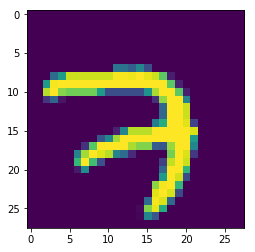

In [0]:
# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)




    

In [0]:
import tensorflow as tf 


def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

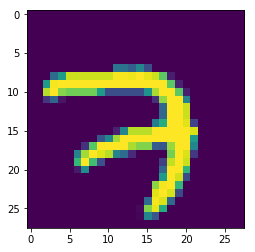

In [0]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

mnist.train.labels[0]

# CNN using Tensorflow




In [0]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv1 = conv2d(x, weights['wc1'], biases['bc1'])
        print('con1_before max',conv1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        print('con2_before max',conv2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        if i % 100 ==0:

            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



con1_before max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
iter:  0 train_cost:  33300.164 train_acc:  0.15625 test_cost:  35811.4 test_acc:  0.125


In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-05 19:52:13--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.4.95.48, 52.45.111.123, 52.207.111.186, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.4.95.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  39.3MB/s    in 0.4s    

2019-06-05 19:52:14 (39.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!rm -rf log

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://3e0137d5.ngrok.io
